## [Reading Materials](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens)

# Libraries and Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data as pandas DataFrame:
fileName = "Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','Datasets', fileName))
data = pd.read_csv(data_dir) 

# take a look at the data head 
data.head(n=2)


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


# Report the total number of crimes in the dataset:

In [2]:
data['Date'].count()


2160953

# List the various categories of crime:

In [3]:
data['Category'].unique()


array(['VEHICLE THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'ASSAULT', 'NON-CRIMINAL', 'BURGLARY',
       'LOITERING', 'ROBBERY', 'SUSPICIOUS OCC', 'FORGERY/COUNTERFEITING',
       'DRUG/NARCOTIC', 'TRESPASS', 'VANDALISM', 'WARRANTS',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'DRUNKENNESS',
       'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'PROSTITUTION', 'ARSON',
       'EMBEZZLEMENT', 'LIQUOR LAWS', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING', 'SUICIDE', 'BRIBERY',
       'FAMILY OFFENSES', 'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS',
       'GAMBLING', 'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype=object)

# How many crime category are there?

In [4]:
data['Category'].nunique()


38

# List the number of crimes in each category:

In [5]:
data['Category'].value_counts(ascending=False)

LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARSON       

# Create a histogram over crime occurrences:

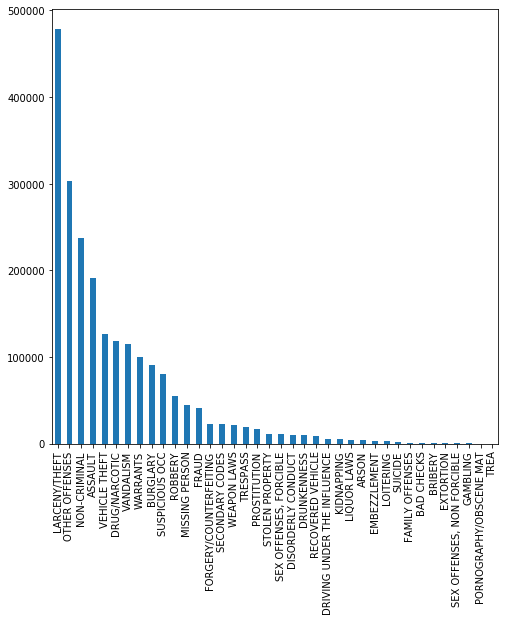

In [6]:
data['Category'].value_counts(ascending=False).plot(kind='bar', figsize =(8,8))


# Count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year?

In [7]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
data = data[data['Year'] != 2018]

### Number of crimes per years from 2003 to 2018 (not included):

In [8]:
data['Year'].value_counts(ascending=True)


2011    128563
2010    129750
2007    133601
2006    133726
2009    136218
2008    137113
2012    137334
2005    138807
2004    144323
2003    145073
2014    147056
2016    148379
2013    149639
2017    151759
2015    153771
Name: Year, dtype: int64

### Average number of crimes from 2003 up to 2018 (not included):

In [9]:
data['Year'].value_counts(ascending=True).mean()


141007.46666666667

# Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action).

In [10]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])


# Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.



### Example of single plot for WEAPON LAWS

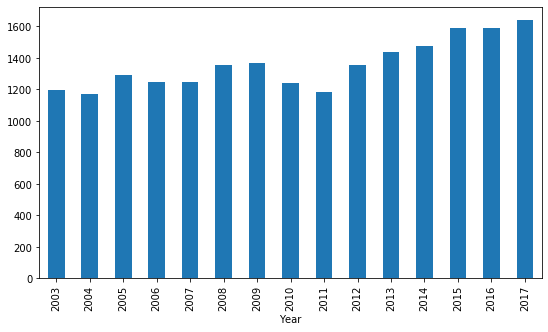

In [11]:
data.groupby(['Category','Year']).count()['PdId'] ['WEAPON LAWS'] .plot(kind='bar', figsize=(9,5))

### Plots for year-by-year development for all Focus Crimes

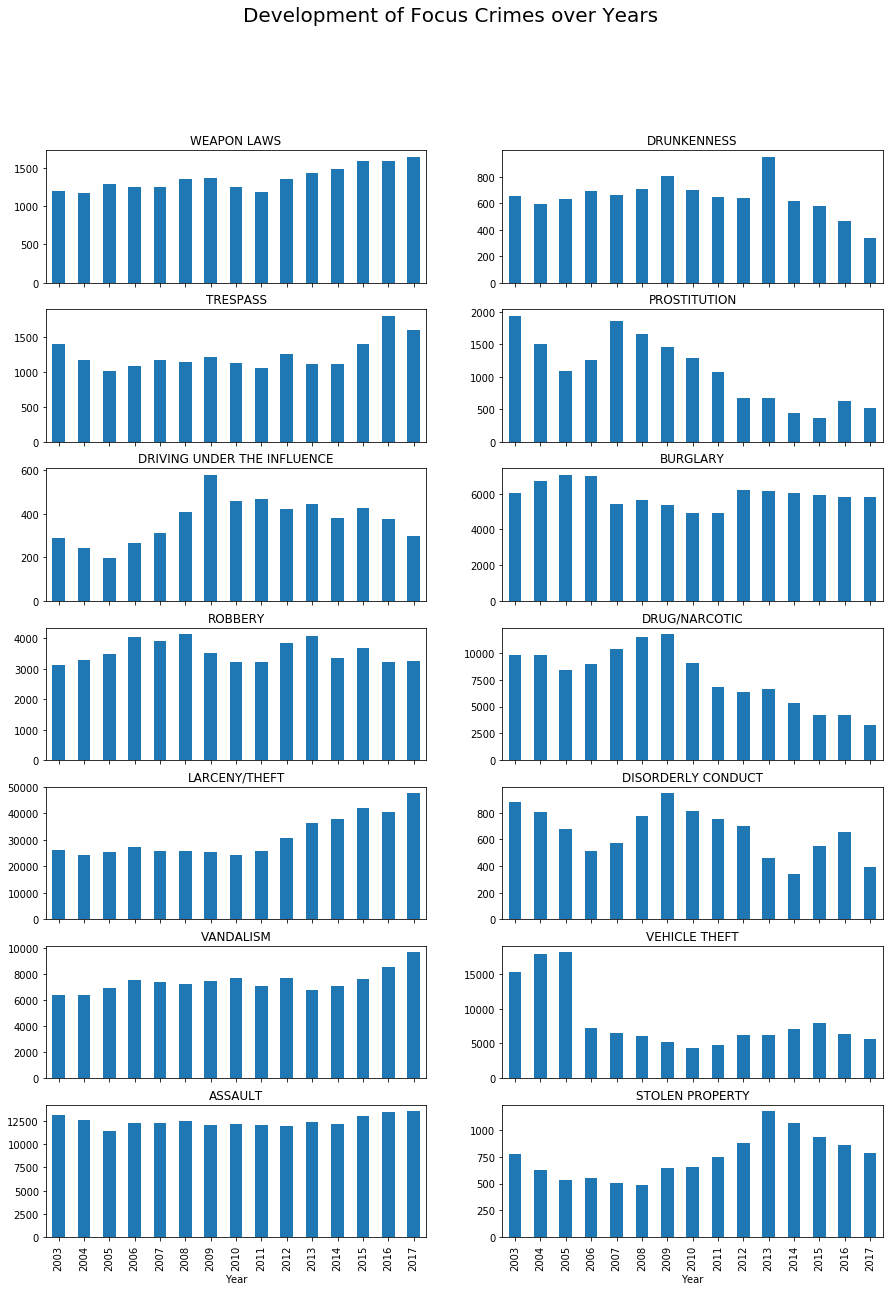

In [12]:
focuscrimes_lst = [ 'WEAPON LAWS', 'DRUNKENNESS',
                    'TRESPASS','PROSTITUTION',
                    'DRIVING UNDER THE INFLUENCE','BURGLARY',
                    'ROBBERY','DRUG/NARCOTIC',
                    'LARCENY/THEFT','DISORDERLY CONDUCT',
                    'VANDALISM', 'VEHICLE THEFT',
                    'ASSAULT', 'STOLEN PROPERTY']
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Years', fontsize=20)
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    data.groupby(['Category','Year']).count()['PdId'] [focuscrimes_lst[i]] .plot(kind='bar',ax=ax)

fig.savefig(fname='Development of Focus Crimes over Years')


# Comment on at least three interesting trends in your plot. Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' get the full story [here:](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html)

* VECHICLE THEFT:
    Huge decrease in occurrences after 2005 when the engine immobilizer systam
    was introduced. Take a look [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html).
   
* ASSAULT:

* STOLEN PROPERTY:
